# 🌟 Day 60 Challenge 🌟

Today's challenge is an events countdown timer.


### Task:
Your program should:
1. Automatically work out today's date.
2. Prompt the user to input the name and date of their event (year, month, and day).
3. Work out the number of days until the event and output it.
4. If the event is happening today, insert some party emojis. 🎉🎊
5. If the event was in the past, add sad face emojis and tell the user how many days ago it was. 😢


### Example:

🌟 **Event Countdown Timer** 🌟

```plaintext
Input the event > Nan's 100th birthday

Input the year > 2022

Input the month > 10

Input the day > 16

🎉🎉 Nan's 100th birthday is today! 🎉🎉
```

### Hints:
1. Subtract today's date from the delta.
2. What type of number will you get if the date has passed?

In [3]:
import datetime
import os

# Function to clear the screen
def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

# Function to get the event details from the user
def get_event_details():
    event_name = input("Event Name: ").strip()
    while True:
        try:
            day = int(input("Day: "))
            month = int(input("Month: "))
            year = int(input("Year: "))
            event_date = datetime.date(year, month, day)
            return event_name, event_date
        except ValueError:
            print("Invalid date. Please enter a valid date.")

# Main function to calculate the event countdown
def main():
    clear_screen()
    today = datetime.date.today()
    print("EVENT COUNTDOWN")
    
    event_name, event_date = get_event_details()
    
    difference = (event_date - today).days
    
    if difference > 0:
        print(f"{difference} days to go until {event_name}")
    elif difference < 0:
        print(f"😭😭😭😭😭😭😭 You missed {event_name} by {-difference} days!")
    else:
        print(f"🥳🥳🥳🥳🥳🥳🥳 {event_name} is today!")

# Run the main function
if __name__ == "__main__":
    main()

EVENT COUNTDOWN


3 days to go until New years' eve


# 👈 Day 61 Challenge 👈

Someone is **wrong** on the Internet!

Today, we're going to fix the major malfunction with social media - other people and their stupid opinions - and create a Twitter for one!

I know you like to hear the sound of your own voice!


## Your program should:
1. Display a menu - Add or View tweets.
2. **'Add'** should:

   i. Get the tweet input.  
   ii. Store it to the database with the current timestamp as the key value.  
3. **'View'** should:

   i. Show the tweets in reverse chronological order.  
   ii. Show 10 tweets at a time.  
   iii. Prompt the user to show another 10 tweets (yes or no).  
   iv. A 'no' choice goes back to the menu.  


### Timestamp Code:

```python
timestamp = datetime.datetime.now()
```

### Hints:
1. Use the ```datetime``` library to get the current timestamp.
2. Use the ```os``` library to clear the console between each 10 tweets shown.

In [1]:
import shelve
import datetime
import os
import time
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()
data_path = os.getenv('DATA_PATH')

# Define the path to the database file
db_path = os.path.join(data_path, 'databases/tweets_db')

def add_tweet(db):
    """
    Prompt the user to input a tweet and store it in the database with a timestamp.
    """
    # Get the tweet from the user
    tweet = input("🐥 > ")
    
    # Get the current timestamp
    timestamp = datetime.datetime.now()
    
    # Create a unique key for the tweet using the timestamp
    key = f"mes{timestamp}"
    
    # Store the tweet and timestamp in the database
    db[key] = (tweet, timestamp)
    
    # Wait for a second and clear the console
    time.sleep(1)
    clear_console()
    
    # Show all tweets after adding a new one
    view_tweets(db)

def view_tweets(db):
    """
    Retrieve and display tweets from the database in reverse chronological order.
    """
    # Get all keys that start with "mes" (tweets)
    keys = [key for key in db.keys() if key.startswith("mes")]
    
    # Check if there are no tweets
    if not keys:
        print("No tweets available.")
        time.sleep(1)
        clear_console()
        return
    
    # Sort the keys in reverse chronological order
    keys.sort(reverse=True)
    
    counter = 0
    for key in keys:
        # Retrieve the tweet and timestamp
        value = db[key]
        if isinstance(value, tuple) and len(value) == 2:
            tweet, timestamp = value
            # Format the timestamp without microseconds
            timestamp_str = timestamp.strftime("%Y-%m-%d %H:%M:%S")
            # Print each tweet with its timestamp
            print(f"{timestamp_str} {tweet}")
            print()
        else:
            # Remove entries without a timestamp
            del db[key]
        
        # Wait for a short time before displaying the next tweet
        time.sleep(0.3)
        
        counter += 1
        if counter % 10 == 0:
            # After every 10 tweets, ask the user if they want to continue
            carry_on = input("Next 10? (yes/no): ")
            if carry_on.lower() == "no":
                break
    
    # Wait for a second and clear the console
    time.sleep(1)
    clear_console()

def clear_console():
    """
    Clear the console screen.
    """
    # Use the appropriate command to clear the console based on the operating system
    os.system("cls" if os.name == "nt" else "clear")

def main():
    """
    Main function to run the Tweeter application.
    """
    # Ensure the data directory exists
    os.makedirs(data_path, exist_ok=True)
    
    # Open the shelve database
    with shelve.open(db_path) as db:
        while True:
            # Display the menu
            print("Tweeter")
            menu = input("1: Add Tweet\n2: View Tweets\n3: Exit\n> ")
            
            # Handle the user's menu choice
            if menu == "1":
                add_tweet(db)
            elif menu == "2":
                view_tweets(db)
            elif menu == "3":
                print("Exiting Tweeter. Goodbye!")
                break
            else:
                # Handle invalid menu choices
                print("Invalid option. Please choose 1, 2, or 3.")
                time.sleep(1)
                clear_console()

if __name__ == "__main__":
    main()

Tweeter


2024-12-28 14:12:14 nice

2024-12-28 14:12:04 I am fine

2024-12-28 14:11:51 how are you?

Tweeter
2024-12-28 14:21:58 guapi

2024-12-28 14:12:14 nice

2024-12-28 14:12:04 I am fine

2024-12-28 14:11:51 how are you?

Tweeter
Exiting Tweeter. Goodbye!


# 👈 Day 62 Challenge 👈

Look out, Big Brother! Today is a project day, and you are going to build your own private diary to keep your innermost thoughts secret from the world.


## Your diary should:
1. **Set an access password.**
2. **Prompt the user to type in a password.**
   - If they don’t get the password right, exit the program.
3. **If they get it right:**
   - Enter the main menu, which gives 'Add' or 'View' diary entries.
4. **Choosing 'add' should:**
   i. Prompt the user to type the entry and store it in the database with the timestamp as the key.  
5. **Choosing 'view' should:**
   i. Show the user the previous (most recent) entry.  
   ii. They can then choose to see the next previous entry working backwards until they get to the end. Or exit back to the menu.  


🎉 **Extra points:**  
- Add a feature that allows the user to view an entry from an exact date.


### Hints:
1. Use `if passwordEntered != correctPassword` to verify the user.
2. Use `os.clear()` to clear the screen between each entry viewed.
3. **Extra points:** Compare the date entered to the timestamp and only show if `date entered >= timestamp`.


In [15]:
import os
import time
import datetime
import shelve
import hashlib
import random
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
BASE_PATH = os.getenv('BASE_PATH')
DB_PATH = os.path.join(BASE_PATH, 'data', 'databases', 'diary_db')

def show_users(db):
    """Display all registered users."""
    users = []
    
    # Check old format
    if "credentials" in db:
        users.append(db["credentials"]["username"])
    
    # Check new format
    for key in db.keys():
        if key.startswith("user_"):
            users.append(db[key]["username"])
    
    print("\nRegistered users:")
    for user in sorted(set(users)):  # Remove duplicates
        print(user)

def add_entry(db, username):
    """Add a diary entry."""
    time.sleep(1)
    os.system('cls' if os.name == 'nt' else 'clear')
    timestamp = datetime.datetime.now()
    print(f"Diary entry for {timestamp}")
    print()
    entry = input("> ")
    db[f"{username}_{timestamp}"] = entry

def view_entries(db, username):
    """View diary entries."""
    os.system('cls' if os.name == 'nt' else 'clear')
    entries = [(k, v) for k, v in db.items() 
               if k.startswith(username) and not k.startswith('users')]
    
    if not entries:
        print("No entries found")
        return
        
    for key, entry in sorted(entries):
        timestamp = key.split('_', 1)[1]
        print(f"\n{timestamp}")
        print(f"{entry}")

def authenticate():
    """Authenticate user."""
    with shelve.open(DB_PATH) as db:
        while True:
            show_users(db)
            choice = input("\n1: Login  2: Register  3: Exit\n> ")
            
            if choice == "3":
                return None
                
            if choice == "2":
                username = input("Username > ")
                password = input("Password > ")
                salt = random.randint(1000, 9999)
                hashed = hashlib.sha256(f"{password}{salt}".encode()).hexdigest()
                db[f"user_{username}"] = {"username": username, "password": hashed, "salt": salt}
                return username

            if choice == "1":
                username = input("Username > ")
                password = input("Password > ")
                
                # Check old format
                if "credentials" in db:
                    creds = db["credentials"]
                    if username == creds["username"]:
                        if creds["password"] == hashlib.sha256(f"{password}{creds['salt']}".encode()).hexdigest():
                            return username
                
                # Check new format
                user_key = f"user_{username}"
                if user_key in db:
                    user = db[user_key]
                    if user["password"] == hashlib.sha256(f"{password}{user['salt']}".encode()).hexdigest():
                        return username
                
                print("Incorrect username or password")

def main():
    """Main program."""
    username = authenticate()
    if not username:
        print("Goodbye!")
        return

    while True:
        os.system('cls' if os.name == 'nt' else 'clear')
        print(f"Logged in as: {username}")
        menu = input("1: Add  2: View  3: Exit\n> ")
        
        with shelve.open(DB_PATH) as db:
            if menu == "1":
                add_entry(db, username)
            elif menu == "2":
                view_entries(db, username)
            elif menu == "3":
                print("Goodbye!")
                break

if __name__ == "__main__":
    main()


Registered users:
paco
paquito
Logged in as: paco

2024-12-30 01:24:42
hola

2024-12-30 01:24:50
guapi

2024-12-30 01:36:21.181717
como estas?
Logged in as: paco
Diary entry for 2024-12-30 01:43:25.822986

Logged in as: paco

2024-12-30 01:24:42
hola

2024-12-30 01:24:50
guapi

2024-12-30 01:36:21.181717
como estas?

2024-12-30 01:43:25.822986
jelipolia
Logged in as: paco
Goodbye!


# 👈 Day 63 Challenge 👈

Today's challenge is to become your own librarian. Oook! 🦍


## Task:
In the real world, programmers usually keep a library of their most useful subroutines just like this. You're going to curate your own library with these subroutines:

1. **Go back through your programs and choose some subroutines that you've used _a lot._**
   - Perhaps it was your dice roller.
   - Could be your prettyPrint.
   - Maybe it was your 'generate random baldy insult' subroutine. Whatever. Find them.

2. **Create a new file** that contains all your best subroutines.

3. **Import this file into your `main.py` and call a few** to show that it works.


### Hints:
- You're better than this by now! No hints today, amigos! Good luck! 🍀


In [8]:
# Import all functions from utils.py
from utils import *

# Ensure the data directory exists
os.makedirs('data', exist_ok=True)

# Use the clear_console function
clear_console()

# Use the print_with_delay function
print_with_delay("This is a delayed message.", delay=0.1)

# Use the roll_dice function
dice_result = roll_dice()
print(f"Dice roll result: {dice_result}")

# Use the colorize function
colored_text = colorize("This is a colored text.", "green")
print(colored_text)

# Use the colorize function
colored_text = colorize("This is a multicolored text.")
print(colored_text)

# Use the load_data function
data = load_data("example.txt")
print(f"Loaded data: {data}")

# Use the save_data function
save_data("example.txt", ["Line 1", "Line 2", "Line 3"])
print("Data saved to example.txt")

# Use the timestamp function
current_timestamp = timestamp()
print(f"Current timestamp: {current_timestamp}")

# Use the pretty_print function
pretty_print("Title", "This is the content of the box.", width=50)

# Use the generate_random_insult function
insult = generate_random_insult()
print(f"Random insult: {insult}")

This is a delayed message.
Dice roll result: 2
This is a colored text.
This is a multicolored text.
Loaded data: ['Line 1', 'Line 2', 'Line 3']
Data saved to example.txt
Current timestamp: 2024-12-30 01:33:25
                      Title                       
This is the content of the box.
Random insult: You're as bright as a black hole, and twice as dense.


# OOP

Object-Oriented Programming (OOP) is a **programming paradigm** (a way of thinking about how to solve a problem) that is based on **classes** and **objects**, which store all of their data and behaviors inside them.

You can think of a class like a cookie cutter, or template. It has pre-defined characteristics (shape, size, etc.).

Objects are like the cookies created using the cutter. They all get the same size and shape, but then we can personalize each one (sprinkles, icing, etc.).

Some programming languages, like Java, are entirely based on OOP. So all you Java coders will be used to this way of thinking.

If you're a Python programmer, then this may take some getting used to, but stay with it.

This approach lets us create a template for something like an enemy in a video game, and then use that template to create, say, 20 enemies. Instead of having to code each one individually.

It's very powerful for large-scale projects, but we're going to start small.


## Classes

👉 Let's create a **template**, known as a class. Our theme is animals. Our class will contain all the characteristics (think variables) that animals have in common.

Remember that this is just a template. All the characteristics are set to `'None'` in the template and we will customize these values when we use the template to create (**instantiate**) each animal. The values will be passed as arguments into the `__init__` subroutine inside each animal object.

We also want to create a subroutine called `init` (short for initialization) which tells the class what to do when it is used to create each instance of an animal.

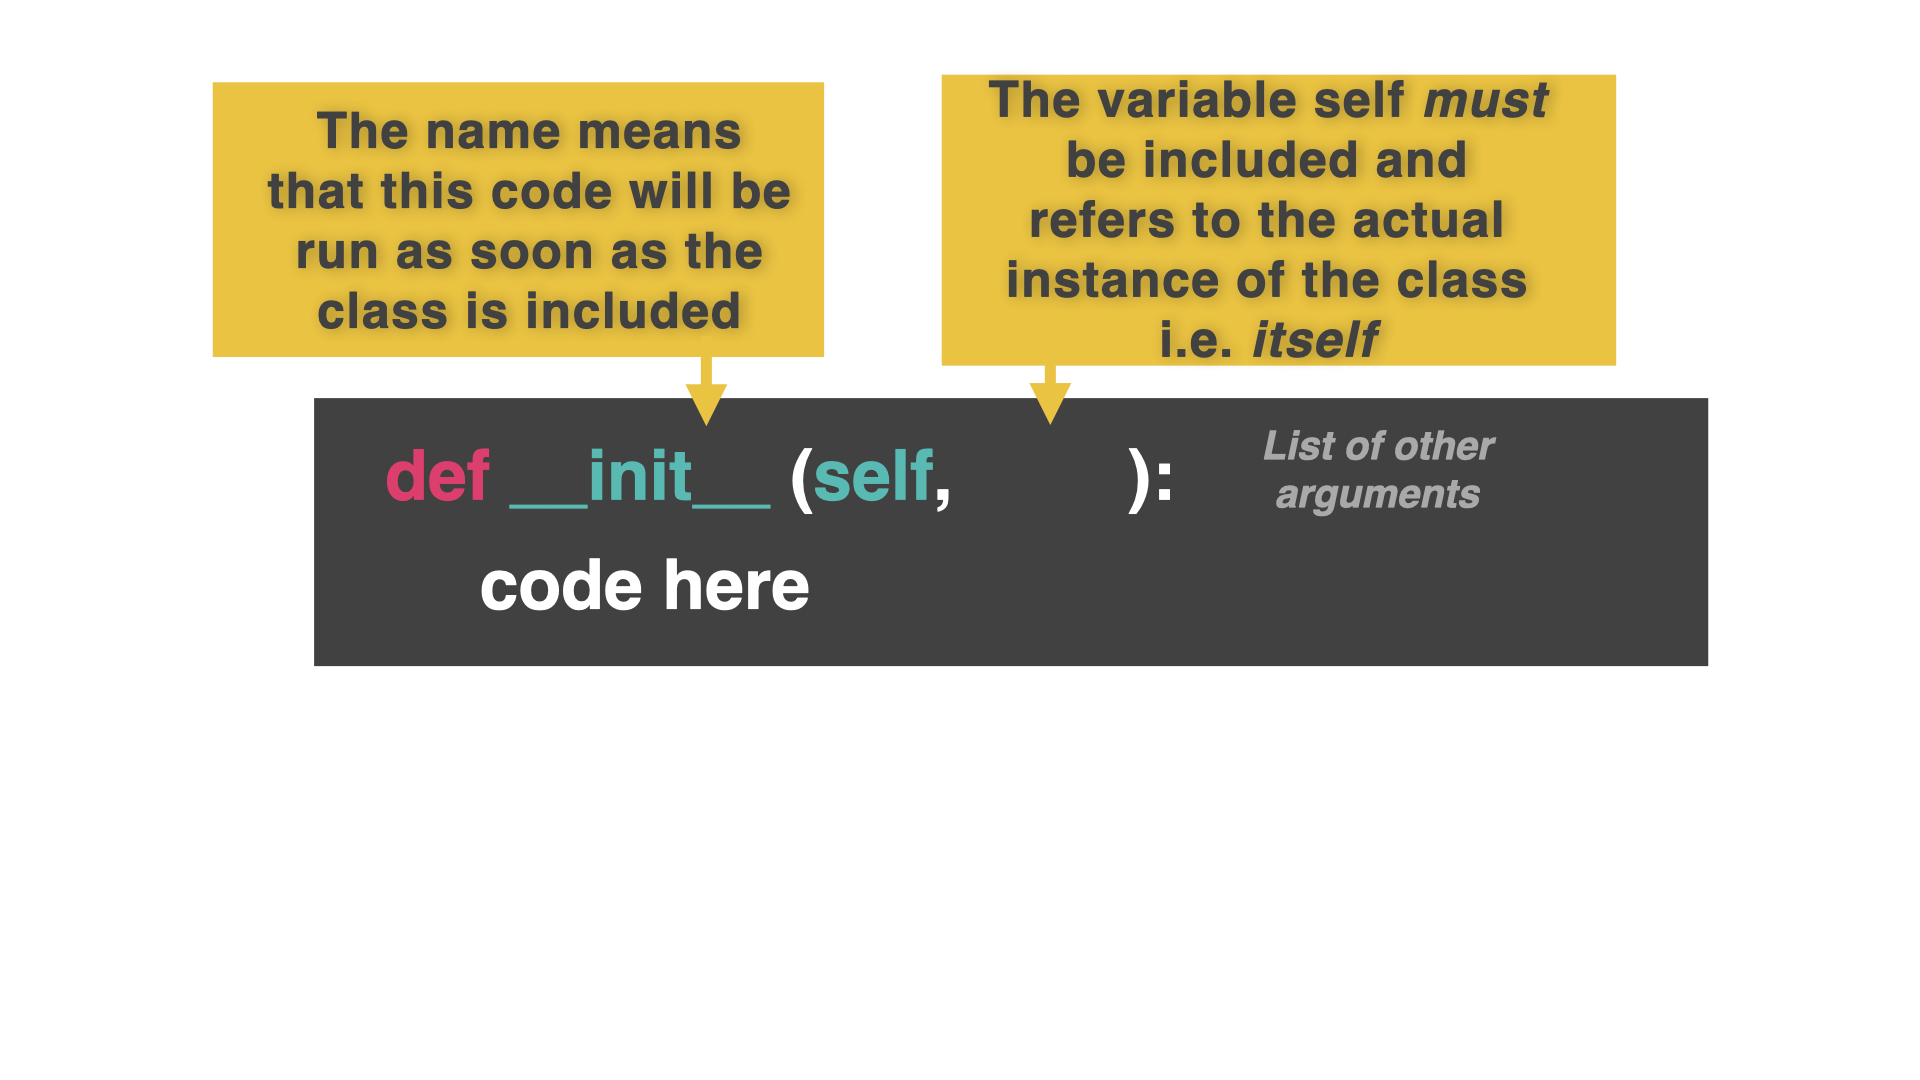

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound
        # 'self' means 'this object'
        # This code sets the name, species, and sound of each object
        # to the arguments passed in when it is created (instantiated).
```

## Instantiation

Instantiation means **using the template to create an object**. Think of it as pressing the cutter into the dough to make a cookie.

👉 Let's instantiate a dog object.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound
        # 'self' means 'this object'
        # This code sets the name, species, and sound of each object
        # to the arguments passed in when it is created (instantiated).

# THE NEW BIT #####

dog = Animal("Brian", "Canine", "Woof") 
# Use the Animal class to create a new object called 'dog' with the following parameters.
```
👉 Now let's output the dog's name.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

dog = Animal("Brian", "Canine", "Woof")

#### THE NEW BIT ###########
print(dog.name)
```
👉 I can use the `Animal()` class to create as many different animals as I want.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

dog = Animal("Brian", "Canine", "Woof")
print(dog.name)

#### THE NEW BIT ###########
cow = Animal("Ermintrude", "Bo Taurus", "Moo")
print(cow.sound)
```


## More Methods

Subroutines inside an object are called methods.

👉 Let's create a `talk` method inside the `Animal` class. This can then be used by both our `dog` and `cow` objects.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

    def talk(self):
        print(f"{self.name} says {self.sound}")
```
👉 Now I can use the `talk()` method for each object.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

    def talk(self):
        print(f"{self.name} says {self.sound}")

# 'self' means 'use the identifier given to the object that is accessing 
# this method'. So if I use it with dog it will become 'dog.talk()' etc.

dog = Animal("Brian", "Canine", "Woof")
dog.talk()

cow = Animal("Ermintrude", "Bo Taurus", "Moo")
cow.talk()
```

# Inheritance

Inheritance means that we can take the template from `Animal` and break it down into sub-classes that use all the attributes and methods from that class, but also add their own attributes.

This is useful when we're thinking about animals as we can start breaking the animal kingdom apart by species.

When I create the sub-class, I use the name of its parent class as a parameter. This means "get all the features of `Animal` and use them here too."

Here, I'm creating a sub-class of `Bird`, which inherits from `Animal`.

👉 I can then create the "bird-specific" features inside the bird sub-class.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

    def talk(self):
        print(f"{self.name} says {self.sound}")

##### The New Bit ##########

class Bird(Animal):

    def __init__(self):
        self.name = "Bird"
        self.species = "Avian"
        self.sound = "Tweet"

# This automatically sets the information for each bird when it is created.

polly = Bird()  # Instantiates a new bird which gets its details from the sub-class.
polly.talk()  # Polly uses the `talk()` method from the Animal class.
```
👉 Let's add a specific color to the bird class.

```python
class Bird(Animal):

    def __init__(self, color):
        self.name = "Bird"
        self.species = "Avian"
        self.sound = "Tweet"
        self.color = color  # Only applies to the bird subclass.

polly = Bird("Green")  # Sets Polly's color to 'Green'.
polly.talk()
print(polly.color)  # Prints Polly's color.
```

We can use inheritance to create a generic class (like 'character') and then sub-divide it into different types (player, enemy, boss etc.)

## 🌟 Day 64 Challenge 🌟

In today's project, create classes to represent jobs.

Your program should:
1. Create a generic `Job` class.
2. The `__init__` method will store the details for name, salary, and hours worked.
3. `Job` will have another method that prints those details nicely.
4. Create two sub-classes from `Job`: `Doctor` and `Teacher`.
5. The `Doctor` subclass should also include `speciality` and `years of experience`.
6. The `Teacher` subclass should also include `subject` and `position`.
7. The print functions for each subclass should print this extra data.
8. Instantiate a lawyer, a computer science teacher, and a pediatric doctor (this is a doctor for children) with 7 years of experience.
9. Output the information for each job.

### Example:
```
🌟Jobs Jobs Jobs!🌟

Job type: Lawyer
Salary: $ Squillions
Hours worked: 60

Job type: Teacher
Salary: $ Nowhere near enough
Hours worked: All of them
Subject: Computer Science
Position: Classroom Teacher

Job type: Doctor
Salary: $ Doing very nicely thank you
Hours worked: 50
Speciality: Pediatric Consultant
Years of Experience: 7
```

### 💡 Hints

- Copy the `print` method to each of your sub-classes and customize it for each one.
- Don't worry about keeping the same method name. The one in the sub-class will override the one in the `Job` main class.


In [5]:
class Job:
    """
    A class to represent a generic job.
    """
    def __init__(self, name, salary, hours_worked):
        """
        Initialize the job with name, salary, and hours worked.
        """
        self.name = name
        self.salary = salary
        self.hours_worked = hours_worked

    def print_details(self):
        """
        Print the details of the job.
        """
        print("== JOB ==")
        print(f"Name: {self.name}")
        print(f"Salary: {self.salary}")
        print(f"Hours Worked: {self.hours_worked}")


class Doctor(Job):
    """
    A class to represent a doctor, inheriting from Job.
    """
    def __init__(self, salary, hours_worked, experience, specialty):
        """
        Initialize the doctor with salary, hours worked, experience, and specialty.
        """
        super().__init__("Doctor", salary, hours_worked)
        self.experience = experience
        self.specialty = specialty

    def print_details(self):
        """
        Print the details of the doctor.
        """
        super().print_details()
        print(f"Experience: {self.experience} years")
        print(f"Specialty: {self.specialty}")


class Teacher(Job):
    """
    A class to represent a teacher, inheriting from Job.
    """
    def __init__(self, salary, hours_worked, subject, position):
        """
        Initialize the teacher with salary, hours worked, subject, and position.
        """
        super().__init__("Teacher", salary, hours_worked)
        self.subject = subject
        self.position = position

    def print_details(self):
        """
        Print the details of the teacher.
        """
        super().print_details()
        print(f"Subject: {self.subject}")
        print(f"Position: {self.position}")


# Create instances of each job type and print their details
lawyer = Job("Lawyer", "$100,000", "40")
lawyer.print_details()

print()  # Add a blank line between different job types

doctor = Doctor("$120,000", "48", "7", "Pediatric Consultant")
doctor.print_details()

print()  # Add a blank line between different job types

teacher = Teacher("$50,000", "48+", "Computer Science", "Assistant Principal")
teacher.print_details()

== JOB ==
Name: Lawyer
Salary: $100,000
Hours Worked: 40

== JOB ==
Name: Doctor
Salary: $120,000
Hours Worked: 48
Experience: 7 years
Specialty: Pediatric Consultant

== JOB ==
Name: Teacher
Salary: $50,000
Hours Worked: 48+
Subject: Computer Science
Position: Assistant Principal


## 🏆 Day 65 Challenge

Today is a project day! You're going to use what you've learned about OOP (on Day 64) to store characters for my video game.

1. My game needs to have a character with a name, health, and magic points.
2. It needs to have a value setup when it is initialized.
3. It needs a method to output this data.
4. There should also be a sub-class `Player` which inherits from `Character` and also has a number of lives.
5. `Player` should also have an `am_I_alive?` method which checks the player status and reports back yes or no.
6. There should also be two enemy sub-classes with additional `type` and `strength`:
   - **Vampire** with a `day/night` tracker.
   - **Orc** with a `speed` attribute.
7. Instantiate one player, two vampires, and three orcs. You choose their names.
8. Print out their values.

### Example:

```plaintext
🌟 Generic RPG 🌟

Player
Name: David
Health: 100
Magic Points: 50
Lives: 3
Alive?: Yes

Name: Boris
Health: 45
Magic Points: 78
Type: Vampire
Strength: 3
Day/Night?: Night

Name: Ruth
Health: 70
Magic Points: 10
Type: Vampire
Strength: 2
Day/Night?: Day

Name: Bill
Health: 60
Magic Points: 5
Type: Orc
Strength: 75
Speed: 90

Name: Ted
Health: 35
Magic Points: 40
Type: Orc
Strength: 88
Speed: 45

Name: Stanton
Health: 30
Magic Points: 40
Type: Orc
Strength: 49
Speed: 90
```

### Hints:
You only need to inherit from the class directly above. So orc only needs to inherit from enemy, for example.

In [9]:
# Base class for all characters
class Character:
    name = None
    health = 100
    mp = 100

    def __init__(self, name):
        self.name = name

    def print_details(self):
        """Print the character's details."""
        print(f"{self.name}\tHP: {self.health}\tMP: {self.mp}")

    def set_stats(self, health, mp):
        """Set the character's health and magic points."""
        self.health = health
        self.mp = mp


# Class for player characters
class Player(Character):
    nickname = None
    lives = 3

    def __init__(self, nickname):
        super().__init__("Player")
        self.nickname = nickname

    def print_details(self):
        """Print the player's details."""
        super().print_details()
        print(f"Nickname: {self.nickname}\tLives: {self.lives}")

    def is_alive(self):
        """Check if the player is alive."""
        if self.lives > 0:
            print(f"{self.nickname} lives on!")
            return True
        else:
            print(f"{self.nickname} has expired!")
            return False


# Class for enemy characters
class Enemy(Character):
    type = None
    strength = None

    def __init__(self, name, type, strength):
        super().__init__(name)
        self.type = type
        self.strength = strength

    def print_details(self):
        """Print the enemy's details."""
        super().print_details()
        print(f"Type: {self.type}\tStrength: {self.strength}")


# Class for orc enemies
class Orc(Enemy):
    speed = None

    def __init__(self, speed):
        super().__init__("Orc", "Orc", 200)
        self.speed = speed

    def print_details(self):
        """Print the orc's details."""
        super().print_details()
        print(f"Speed: {self.speed}")


# Class for vampire enemies
class Vampire(Enemy):
    day = True

    def __init__(self, day):
        super().__init__("Vampire", "Vampire", 150)
        self.day = day

    def print_details(self):
        """Print the vampire's details."""
        super().print_details()
        print(f"Day: {self.day}")


# Create instances of each character type and print their details
ian = Player("Ian the mighty")
ian.print_details()
print(ian.is_alive())

print()  # Add a blank line between different character types

sharron = Orc(250)
gary = Orc(205)
sharron.print_details()
print()  # Add a blank line between different character instances
gary.print_details()

print()  # Add a blank line between different character types

eric = Vampire(False)
eric.print_details()

Player	HP: 100	MP: 100
Nickname: Ian the mighty	Lives: 3
Ian the mighty lives on!
True

Orc	HP: 100	MP: 100
Type: Orc	Strength: 200
Speed: 250

Orc	HP: 100	MP: 100
Type: Orc	Strength: 200
Speed: 205

Vampire	HP: 100	MP: 100
Type: Vampire	Strength: 150
Day: False


## 👉 Day 66 Challenge

Your challenge is to create a simple GUI calculator.

### Your program should:
1. Have buttons for the numbers 0 to 9, plus, minus, multiply, divide, and equals.
2. The user should be able to press buttons to create their calculation.
3. It should output the correct result when they press equals.

### Example:
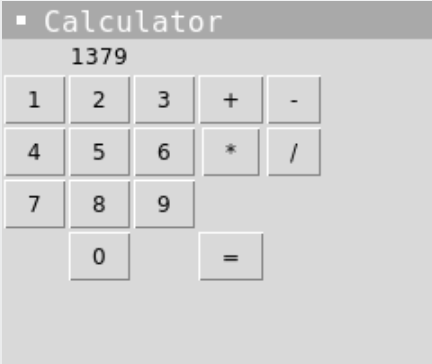

### 💡 Hints
- Use a grid to lay out the buttons.
- Create a `buttonChoice` subroutine or similar that takes in the value of the numeric button clicked, casts it to an int, and displays it in the label.
- Create an `operatorChoice` subroutine that selects which operator to display and use.
- Investigate the `lambda` command for your buttons.
- Use a `calc` subroutine with global variables for `answer`, `lastnumber`, and `operator`.



In [7]:
import tkinter as tk

# Initialize the main window
window = tk.Tk()
window.title("Calculator")
window.geometry("400x200")

# Global variables to store the current answer, last number, operator, and full expression
answer = ""
last_number = 0
operator = None
expression = ""

def type_answer(value):
    """
    Append the pressed number to the current answer and update the display.
    """
    global answer, expression
    answer += str(value)
    expression += str(value)
    hello["text"] = expression

def calc_answer(this_op):
    """
    Store the current answer and operator, then reset the answer for the next input.
    """
    global answer, last_number, operator, expression
    last_number = float(answer)  # Use float to handle decimal numbers
    answer = ""
    operator = this_op
    expression += f" {this_op} "
    hello["text"] = expression

def calc():
    """
    Perform the calculation based on the stored operator and update the display.
    """
    global answer, last_number, operator, expression
    current_number = float(answer)  # Use float to handle decimal numbers
    if operator == "+":
        total = last_number + current_number
    elif operator == "-":
        total = last_number - current_number
    elif operator == "*":
        total = last_number * current_number
    elif operator == "/":
        total = last_number / current_number
    answer = f"{total:.2f}"  # Round the result to 2 decimal places
    expression = answer
    hello["text"] = expression

def clear():
    """
    Clear the current answer and reset the display.
    """
    global answer, last_number, operator, expression
    answer = ""
    last_number = 0
    operator = None
    expression = ""
    hello["text"] = expression

# Create the display label
hello = tk.Label(text=answer, font=("Arial", 24))
hello.grid(row=0, column=0, columnspan=4, sticky="nsew")

# Create number buttons
buttons = [
    ('1', 1, 0), ('2', 1, 1), ('3', 1, 2),
    ('4', 2, 0), ('5', 2, 1), ('6', 2, 2),
    ('7', 3, 0), ('8', 3, 1), ('9', 3, 2),
    ('0', 4, 1)
]

for (text, row, col) in buttons:
    tk.Button(window, text=text, command=lambda t=text: type_answer(t), font=("Arial", 18)).grid(row=row, column=col, sticky="nsew")

# Create operator buttons
operators = [
    ('+', 1, 3), ('-', 2, 3),
    ('*', 3, 3), ('/', 4, 3),
    ('=', 4, 2), ('C', 4, 0)
]

for (text, row, col) in operators:
    if text == '=':
        tk.Button(window, text=text, command=calc, font=("Arial", 18)).grid(row=row, column=col, sticky="nsew")
    elif text == 'C':
        tk.Button(window, text=text, command=clear, font=("Arial", 18)).grid(row=row, column=col, sticky="nsew")
    else:
        tk.Button(window, text=text, command=lambda t=text: calc_answer(t), font=("Arial", 18)).grid(row=row, column=col, sticky="nsew")

# Configure grid to expand
for i in range(5):
    window.grid_rowconfigure(i, weight=1)
    window.grid_columnconfigure(i, weight=1)

# Start the main loop
window.mainloop()

### 👉 Day 67 Challenge

I've provided you with a folder called "Guess Who" containing images of 4 people.

Your program should:

1. Prompt the user to input a name.
2. If the user inputs 'Charlotte', 'Gerald', 'Kate' or 'Mo', then their image should load.
3. Otherwise, an 'image not found' message should display.

#### Example:
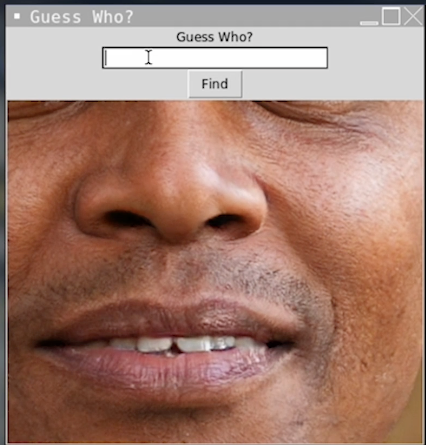

### 💡 Hints
- Pass the user input into the `newImage` variable.
- Use `try... except` to load the image or generate the error.


In [9]:
import tkinter as tk
from PIL import Image, ImageTk
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get the base path from environment variables
BASE_PATH = os.getenv('BASE_PATH')

# Define the full path to the images directory
IMAGES_DIR = os.path.join(BASE_PATH, 'data', 'guess_who')

print(f"Looking for images in: {IMAGES_DIR}")  # Debug print to verify path

# Initialize the main window
window = tk.Tk()
window.title("Guess Who?")
window.geometry("800x600")

# Create and pack the label
hello = tk.Label(text="Guess Who?")
hello.pack()

# Create and pack the text input
text = tk.Text(window, height=1, width=30)
text.pack()

def show_image():
    person = text.get("1.0", "end").strip().lower()
    try:
        canvas.itemconfig(container, image=images[person])
        hello["text"] = f"Showing image for {person.capitalize()}"
    except KeyError:
        hello["text"] = f"Unable to find image for {person}"

# Create and pack the button
button = tk.Button(text="Find", command=show_image)
button.pack()

# Create and pack the canvas
canvas = tk.Canvas(window, width=400, height=380)
canvas.pack()

# Load images with error handling and debug prints
images = {}
for name in ['charlotte', 'gerald', 'katie', 'mo']:
    try:
        image_path = os.path.join(IMAGES_DIR, f"{name}.jpg")
        print(f"Attempting to load: {image_path}")  # Debug print
        if os.path.exists(image_path):
            # Open and resize image
            original_image = Image.open(image_path)
            # Resize image while maintaining aspect ratio
            original_image.thumbnail((400, 400))  # Max size 400x400
            images[name] = ImageTk.PhotoImage(original_image)
            print(f"Successfully loaded {name}")
        else:
            print(f"Warning: Image file not found: {image_path}")
    except Exception as e:
        print(f"Error loading image for {name}: {e}")

# Create an initial image container on the canvas
if images:
    first_image = next(iter(images.values()))
    container = canvas.create_image(200, 190, image=first_image)
    hello["text"] = "Enter a name to see their picture"
else:
    hello["text"] = "No images found in the images directory"
    print(f"No images were loaded from {IMAGES_DIR}")  # Debug print

# Start the main loop
window.mainloop()

Looking for images in: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\charlotte.jpg
Successfully loaded charlotte
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\gerald.jpg
Successfully loaded gerald
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\katie.jpg
Successfully loaded katie
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\mo.jpg
Successfully loaded mo


### 👉 Day 68 Challenge

For today's challenge, you need your code from Day 67.

1. Start the program with no image displayed.
2. If the user inputs a name that can't be found, a new label should appear in the image location saying 'Unable to find image'.

🧠 **Extra points** for getting all the inputs with just one `input` command and the `split` function.

#### Example:
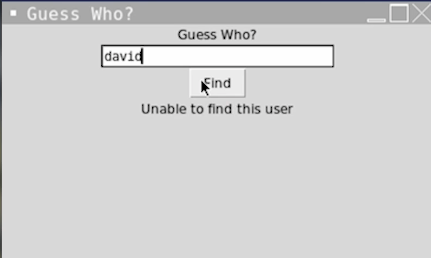

### 💡 Hints
- Create the error label in the main program. Just don't pack it so it doesn't show.
- If the image can't be found, hide the canvas and pack the error label.


In [4]:
import tkinter as tk
from PIL import Image, ImageTk
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get the base path from environment variables
BASE_PATH = os.getenv('BASE_PATH')

# Define the full path to the images directory
IMAGES_DIR = os.path.join(BASE_PATH, 'data', 'guess_who')

print(f"Looking for images in: {IMAGES_DIR}")

# Initialize the main window with larger size
window = tk.Tk()
window.title("Guess Who?")
window.geometry("800x600")  # Made window bigger

# Create and pack the label
hello = tk.Label(text="Guess Who?", font=("Arial", 24))  # Made text bigger
hello.pack(pady=10)  # Added padding

# Create and pack the text input
text = tk.Text(window, height=1, width=30, font=("Arial", 12))  # Made text bigger
text.pack(pady=10)  # Added padding

def show_image(event=None):
    person = text.get("1.0", "end").strip().lower()
    text.delete("1.0", "end")
    try:
        canvas.itemconfig(container, image=images[person])
        hello["text"] = f"Showing image for {person.capitalize()}"
    except KeyError:
        hello["text"] = f"Unable to find image for {person}"

# Bind Enter key to show_image function
text.bind('<Return>', show_image)

# Create and pack the button
button = tk.Button(text="Find", command=show_image, font=("Arial", 12))  # Made button bigger
button.pack(pady=10)  # Added padding

# Create and pack the canvas with larger size
canvas = tk.Canvas(window, width=600, height=400)  # Made canvas bigger
canvas.pack(pady=10)  # Added padding

# Load and resize images
images = {}
for name in ['charlotte', 'gerald', 'katie', 'mo']:
    try:
        image_path = os.path.join(IMAGES_DIR, f"{name}.jpg")
        print(f"Attempting to load: {image_path}")
        if os.path.exists(image_path):
            # Open and resize image
            original_image = Image.open(image_path)
            # Resize image while maintaining aspect ratio
            original_image.thumbnail((400, 400))  # Max size 400x400
            images[name] = ImageTk.PhotoImage(original_image)
            print(f"Successfully loaded {name}")
        else:
            print(f"Warning: Image file not found: {image_path}")
    except Exception as e:
        print(f"Error loading image for {name}: {e}")

# Create an initial image container on the canvas
if images:
    first_image = next(iter(images.values()))
    container = canvas.create_image(300, 200, image=first_image)  # Centered in larger canvas
    hello["text"] = "Enter a name to see their picture"
else:
    hello["text"] = "No images found in the images directory"
    print(f"No images were loaded from {IMAGES_DIR}")

# Store images as a window attribute to prevent garbage collection
window.images = images

# Start the main loop
window.mainloop()

Looking for images in: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\charlotte.jpg
Successfully loaded charlotte
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\gerald.jpg
Successfully loaded gerald
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\katie.jpg
Successfully loaded katie
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\mo.jpg
Successfully loaded mo


## 🧠 Day 69 Challenge

Today's challenge is to create your own visual novel. This is a type of 'choose your own adventure' video game that will show images and a bit of text and let you make decisions that influence what will be displayed next.

### Your program should:
1. Start with a picture, short text introduction, and two options.
2. Allow the user to click buttons to choose their option.
3. Display the correct branch, story image & text, and further option buttons based on their choice.
4. From one branch, both of the second options should lead to the same unhappy ending (not nice, but it'll save you time).
5. The ending should be an image, some text, and a 'start again' button that takes you back to page 1.
6. The second branch should have two options: one that leads to a good ending, and one to a bad. Both of these should also have a 'start again' button.

### Example:
Your visual novel might look something like this:
1. Page 1: Image, short introduction, and two buttons: "Explore the forest" or "Enter the cave."
2. Page 2: Depending on your choice, show the next story branch with an image and text. Provide two new options for each branch.
3. Endings: Conclude the story with a unique image, some text, and a 'start again' button for replayability.

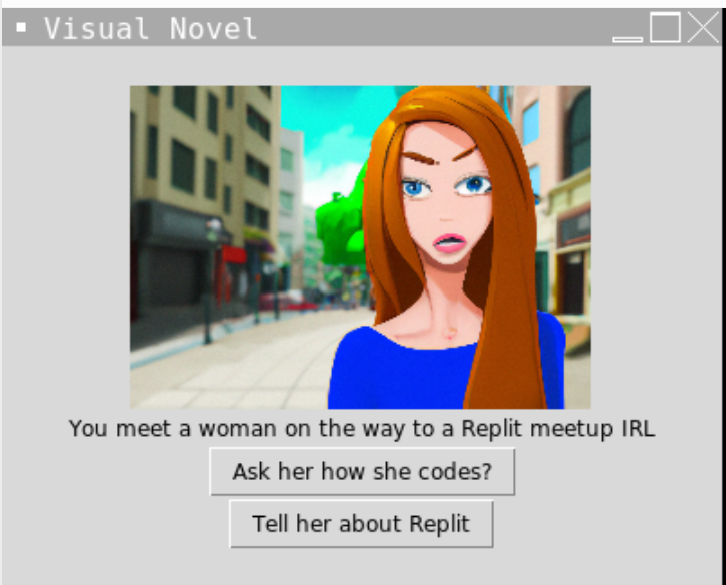
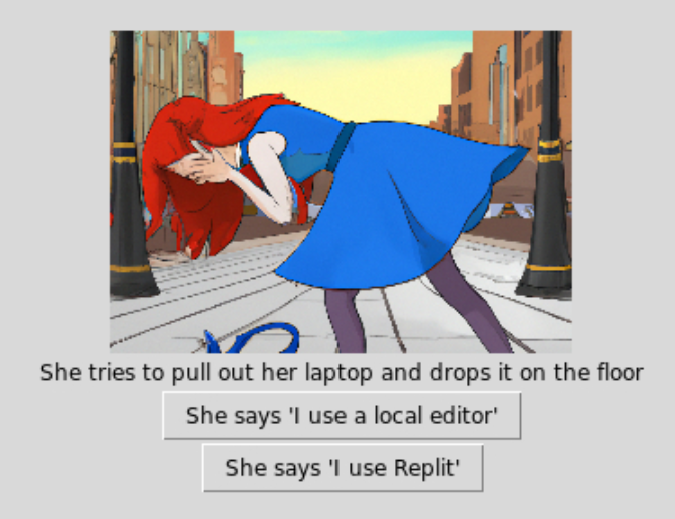
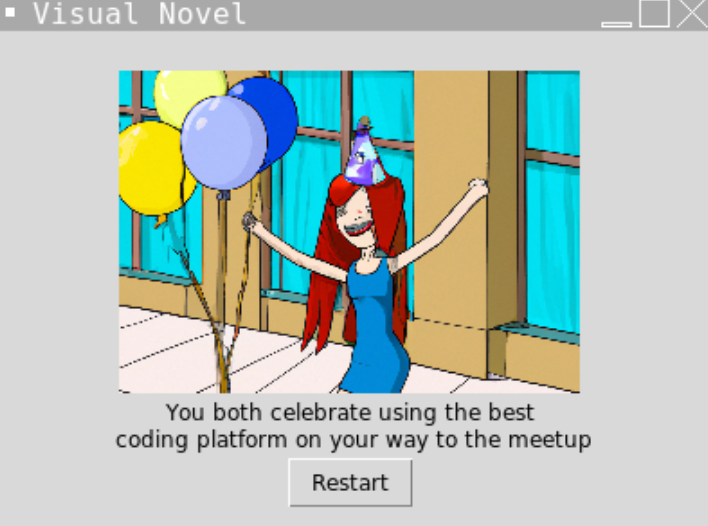

### 💡 Hints
- Nothing big here. Just use subroutines for each of your pages and call them when necessary.
- Create all of your images and text labels in the main program, but only pack them when they should appear.
- Don't forget to unpack the other page elements that should disappear.


In [1]:
import tkinter as tk
from PIL import Image, ImageTk
from dotenv import load_dotenv
import os

# Load environment variables and set up paths
load_dotenv()
BASE_PATH = os.getenv('BASE_PATH')
IMAGES_DIR = os.path.join(BASE_PATH, 'data', 'guess_who')

# Initialize window
window = tk.Tk()
window.title("Visual Novel")
window.geometry("800x600")

def load_image(filename, size=(400, 300)):
    """Load and resize an image"""
    try:
        image_path = os.path.join(IMAGES_DIR, filename)
        image = Image.open(image_path)
        image = image.resize(size)
        return ImageTk.PhotoImage(image)
    except Exception as e:
        print(f"Failed to load image {filename}: {e}")
        return None

def update_page(image, text, *buttons_to_show):
    """Update the page with new image, text and buttons"""
    if image:
        canvas.itemconfig(image_container, image=image)
        canvas.image = image  # Keep a reference
    
    story_label.config(text=text)
    
    # Hide all buttons
    for button in [choice1_btn, choice2_btn, restart_btn]:
        button.pack_forget()
    
    # Show specified buttons
    for button in buttons_to_show:
        button.pack(pady=5)

def start_story():
    """Initialize or restart the story"""
    update_page(
        images['charlotte'],
        "You meet someone on the way to a Replit meetup IRL.\nWhat do you do?",
        choice1_btn,
        choice2_btn
    )
    choice1_btn.config(text="Ask how they code", command=ask_coding)
    choice2_btn.config(text="Tell them about Replit", command=tell_replit)

def ask_coding():
    """First branch - asking about coding"""
    update_page(
        images['gerald'],
        "They try to pull out their laptop and drop it on the floor!",
        choice1_btn,
        choice2_btn
    )
    choice1_btn.config(text="They use a local editor", command=local_editor)
    choice2_btn.config(text="They use Replit", command=uses_replit)

def tell_replit():
    """Second branch - telling about Replit"""
    update_page(
        images['katie'],
        "Why I use Replit of course, like every sane individual!",
        choice1_btn,
        choice2_btn
    )
    choice1_btn.config(text="Say 'I use Replit too!'", command=replit_too)
    choice2_btn.config(text="Mention 100 days of code", command=days_of_code)

def local_editor():
    """Bad ending - local editor"""
    update_page(
        images['mo'],
        "They spend two hours loading up a code editor\nand getting it working, you wait politely...",
        restart_btn
    )

def uses_replit():
    """Good ending - uses Replit"""
    update_page(
        images['katie'],
        "You both celebrate using the best\ncoding platform on your way to the meetup!",
        restart_btn
    )

def replit_too():
    """Good ending - both use Replit"""
    update_page(
        images['charlotte'],
        "They tell you all about their coding journey!",
        restart_btn
    )

def days_of_code():
    """Best ending - 100 days of code"""
    update_page(
        images['katie'],
        "You both celebrate using Replit\nand talk about 100 days of code!",
        restart_btn
    )

# Create GUI elements
canvas = tk.Canvas(window, width=400, height=300)
canvas.pack(pady=20)

# Load images
images = {}
for name in ['charlotte', 'gerald', 'katie', 'mo']:
    images[name] = load_image(f"{name}.jpg")

# Create image container
image_container = canvas.create_image(200, 150, image=images['charlotte'])

# Create text label
story_label = tk.Label(window, text="", wraplength=600, font=("Arial", 14))
story_label.pack(pady=20)

# Create buttons
choice1_btn = tk.Button(window, text="Choice 1", font=("Arial", 12))
choice2_btn = tk.Button(window, text="Choice 2", font=("Arial", 12))
restart_btn = tk.Button(window, text="Start Again", command=start_story, font=("Arial", 12))

# Start the story
start_story()

# Start the main loop
window.mainloop()

### 👉 Day 70 Challenge

Build a login system for two types of users.

Your program should:

1. Have two types of user - **admin** and **normal**. Each should have their own username and password.
2. The admin user should be greeted with *'Hello admin'*.
3. The normal user should be greeted with *'Hello normie'*.

#### Example:

🌟 **Login System** 🌟
```
🌟Login System🌟

Username > admin01

Password > thepowerTHEPOWER

Hello admin
```

### Hints:
-You'll need 4 secrets.

In [9]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

def authenticate_user():
    """
    Authenticate the user by checking the provided username and password
    against the environment variables.
    """
    while True:
        username = input("Username (or type 'exit' to quit): ")
        if username.lower() == 'exit':
            print("Exiting...")
            break

        password = input("Password: ")
        
        # Check if the provided credentials match the admin credentials
        if username == os.getenv('adminUsername') and password == os.getenv('adminPassword'):
            print("Welcome Admin")
            break
        # Check if the provided credentials match the normal user credentials
        elif username == os.getenv('username') and password == os.getenv('userPassword'):
            print("Welcome Normy")
            break
        else:
            print("Try again")

# Run the authentication function
if __name__ == "__main__":
    authenticate_user()

Welcome Normy


In [4]:
#Better security

import os
from dotenv import load_dotenv
import hashlib
import hmac

# Load environment variables
load_dotenv()

def secure_compare(a: str, b: str) -> bool:
    """
    Compare two strings in constant time to prevent timing attacks.
    """
    return hmac.compare_digest(a.encode(), b.encode())

def authenticate_user():
    """
    Secure authentication function.
    - Uses constant-time comparison
    - No stored passwords in variables
    - Minimal exposure of sensitive data
    - Safe to publish on GitHub
    """
    while True:
        username = input("Username (or 'exit' to quit): ").strip()
        if username.lower() == 'exit':
            return None

        password = input("Password: ").strip()

        # Check credentials without storing them
        if secure_compare(username, os.getenv('adminUsername', '')) and \
           secure_compare(password, os.getenv('adminPassword', '')):
            return "admin"
        elif secure_compare(username, os.getenv('username', '')) and \
             secure_compare(password, os.getenv('userPassword', '')):
            return "user"
        else:
            print("Invalid credentials. Please try again.")

def main():
    """
    Main function with role-based access.
    """
    print("🔐 Secure Login System")
    print("----------------------")
    
    role = authenticate_user()
    
    if role == "admin":
        print("Welcome, Administrator!")
        # Add admin-specific functionality here
    elif role == "user":
        print("Welcome, User!")
        # Add user-specific functionality here
    else:
        print("Goodbye!")

if __name__ == "__main__":
    main()

🔐 Secure Login System
----------------------
Welcome, User!


In [5]:
# Force reload the .env file, sometimes is necessary
load_dotenv(override=True)

True

## 🌟 Day 71 Challenge 🌟

Today's challenge is to build a simple login system.

### Your program should:
1. **Display a menu** with the ability to add a user or login.
2. **'Add' user** should:
   - i. Ask for a username and password.
   - ii. Create a new password and a randomly generated 4-digit salt.
   - iii. Append the salt to the password and hash it.
   - iv. Store the hash and the salt in a repl db with the username as the key.
3. **'Login'** should:
   - i. Get username and password input.
   - ii. Display a success message if details are correct.
4. This system should work with multiple users.

### Example:
```
🌟Login System🌟

1: Add User, 2: Login >  1

Username: > Kenny
Password: > L0gg1ns

Details stored.

1: Add User, 2: Login >  2

Username: > Kenny
Password: > L0gg1ns

Login successful
```

### Hints:
-Try implementing the two menu options as subroutines. You'll be able to port them to other programs more easily.

In [12]:
import os
import time
import random
import hashlib
import shelve
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get the base path from environment variables
BASE_PATH = os.getenv('BASE_PATH', 'data')

# Define the path to the database file
DB_DIR = os.path.join(BASE_PATH, 'data', 'backups')
DB_PATH = os.path.join(DB_DIR, 'user_db')

# Ensure the database directory exists
os.makedirs(DB_DIR, exist_ok=True)

def hash_password(password, salt):
    """
    Hash the password with the provided salt using SHA-256.
    """
    return hashlib.sha256(f"{password}{salt}".encode()).hexdigest()

def create_user(db):
    """
    Create a new user with a unique username and hashed password.
    """
    time.sleep(1)
    os.system("clear")
    username = input("Username: ")
    password = input("Password: ")
    
    # Check if the username already exists
    if username in db:
        print("ERROR: Username exists")
        return

    # Generate a random salt and hash the password
    salt = random.randint(1000, 9999)
    hashed_password = hash_password(password, salt)
    
    # Store the user data in the database
    db[username] = {"password": hashed_password, "salt": salt}

    print("User added")
    display_users(db)

def login(db):
    """
    Authenticate a user by checking the provided username and password.
    """
    time.sleep(1)
    os.system("clear")
    username = input("Username: ")
    password = input("Password: ")
    
    # Check if the username exists
    if username not in db:
        print("ERROR: Username does not exist")
        return

    # Retrieve the stored salt and hash the provided password
    salt = db[username]["salt"]
    hashed_password = hash_password(password, salt)

    # Check if the hashed password matches the stored password
    if db[username]["password"] == hashed_password:
        print("Logged in")
    else:
        print("Username or password incorrect")

def display_users(db):
    """
    Display all users in the database.
    """
    print("Current users in the database:")
    for key in db:
        print(key)

def main():
    """
    Main function to display the menu and handle user input.
    """
    with shelve.open(DB_PATH) as db:
        display_users(db)
        while True:
            menu = input("1: New User\n2: Login\n3: Exit\n> ")
            if menu == "1":
                create_user(db)
            elif menu == "2":
                login(db)
            elif menu == "3":
                print("Exiting...")
                break
            else:
                print("Invalid option. Please try again.")

# Run the main function
if __name__ == "__main__":
    main()

Current users in the database:
ERROR: Username does not exist
User added
Current users in the database:
paco
Logged in
Username or password incorrect
Logged in
Exiting...


## 🌟 Day 72 Challenge 🌟

Now that we know about secure passwords, we can **really** protect our diary program.

### Instructions:
Go back 10 days and grab your diary code from **Day 62**.

When you have it, add the following features:

1. The **first time** the diary is run, the user must create a username and password.
2. **Salt & hash** the password and store it in the database with the username as the key.
3. Then proceed to the diary.
4. The **next time** the program is run, it should prompt for the username and password, and only allow access if they are correct.
5. The username, password, and salt should be **excluded** from diary entry outputs, for obvious reasons.

### 💡 Hints:
- **Figure out if it's the first time** by counting the keys in the diary. If there are none, it's the first time.
- The username and password will be the first key entry in the database. Think about where you start outputting diary entries and adjust your loops.


In [20]:
import os
import time
import datetime
import shelve
import hashlib
import random
from dotenv import load_dotenv
from utils import *

# Load environment variables
load_dotenv()
BASE_PATH = os.getenv('BASE_PATH')
DB_PATH = os.path.join(BASE_PATH, 'data', 'databases', 'diary_db')

def show_users(db):
    """Display all registered users."""
    users = []
    
    # Check old format
    if "credentials" in db:
        users.append(db["credentials"]["username"])
    
    # Check new format
    for key in db.keys():
        if key.startswith("user_"):
            users.append(db[key]["username"])
    
    print("\nRegistered users:")
    for user in sorted(set(users)):
        print(user)

def add_entry(db, username):
    """Add a diary entry."""
    clear_console()
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Diary entry for {timestamp}")
    entry = input("> ")
    db[f"{username}_{timestamp}"] = entry

def view_entries(db, username):
    """View diary entries."""
    clear_console()
    entries = [(k, v) for k, v in db.items() 
               if k.startswith(username) and not k.startswith('user_')]
    
    if not entries:
        print("No entries found")
        return
        
    for key, entry in sorted(entries):
        timestamp = key.split('_', 1)[1]
        print(f"\n{timestamp}")
        print(f"{entry}")

def authenticate():
    """Authenticate user."""
    with shelve.open(DB_PATH) as db:
        while True:
            show_users(db)
            choice = input("\n1: Login  2: Register  3: Exit\n> ")
            
            if choice == "3":
                return None
                
            elif choice == "2":
                username = input("New username > ")
                # Check if username exists
                user_key = f"user_{username}"
                if user_key in db or (
                    "credentials" in db and 
                    db["credentials"]["username"] == username
                ):
                    print("Username already exists")
                    continue
                    
                password = input("Password > ")
                salt = random.randint(1000, 9999)
                hashed = hash_password(password, salt)
                db[f"user_{username}"] = {
                    "username": username, 
                    "password": hashed, 
                    "salt": salt
                }
                print("User registered successfully!")
                return username

            elif choice == "1":
                username = input("Username > ")
                password = input("Password > ")
                
                # Check old format
                if "credentials" in db:
                    creds = db["credentials"]
                    if username == creds["username"]:
                        if creds["password"] == hash_password(password, creds["salt"]):
                            return username
                
                # Check new format
                user_key = f"user_{username}"
                if user_key in db:
                    user = db[user_key]
                    if user["password"] == hash_password(password, user["salt"]):
                        return username
                
                print("Incorrect username or password")

def main():
    """Main program."""
    username = authenticate()
    if not username:
        print("Goodbye!")
        return

    while True:
        clear_console()
        print(f"Logged in as: {username}")
        menu = input("1: Add  2: View  3: Exit\n> ")
        
        with shelve.open(DB_PATH) as db:
            if menu == "1":
                add_entry(db, username)
            elif menu == "2":
                view_entries(db, username)
            elif menu == "3":
                print("Goodbye!")
                break

if __name__ == "__main__":
    main()


Registered users:
paco
paquirri
paquita
paquito
Logged in as: paquirri

2024-12-30 01:48:13
soy fea
Logged in as: paquirri
Goodbye!


# Hyper Text Markup Language

Over the next couple of days, we'll be taking a crash course in **HTML** (Hyper Text Markup Language).

### What is HTML?
HTML is a **markdown language**. This means that it is used to tell webpages how to render on screen (basically how to look).

- It is made up of a series of instructions in `<tags>` that surround text/image filenames, etc., and influence how they are displayed on screen.

Starting an HTML REPL gives us some useful boilerplate starter code. Instead of the console, we get a web view on the right so we can see how the code will look in a browser.

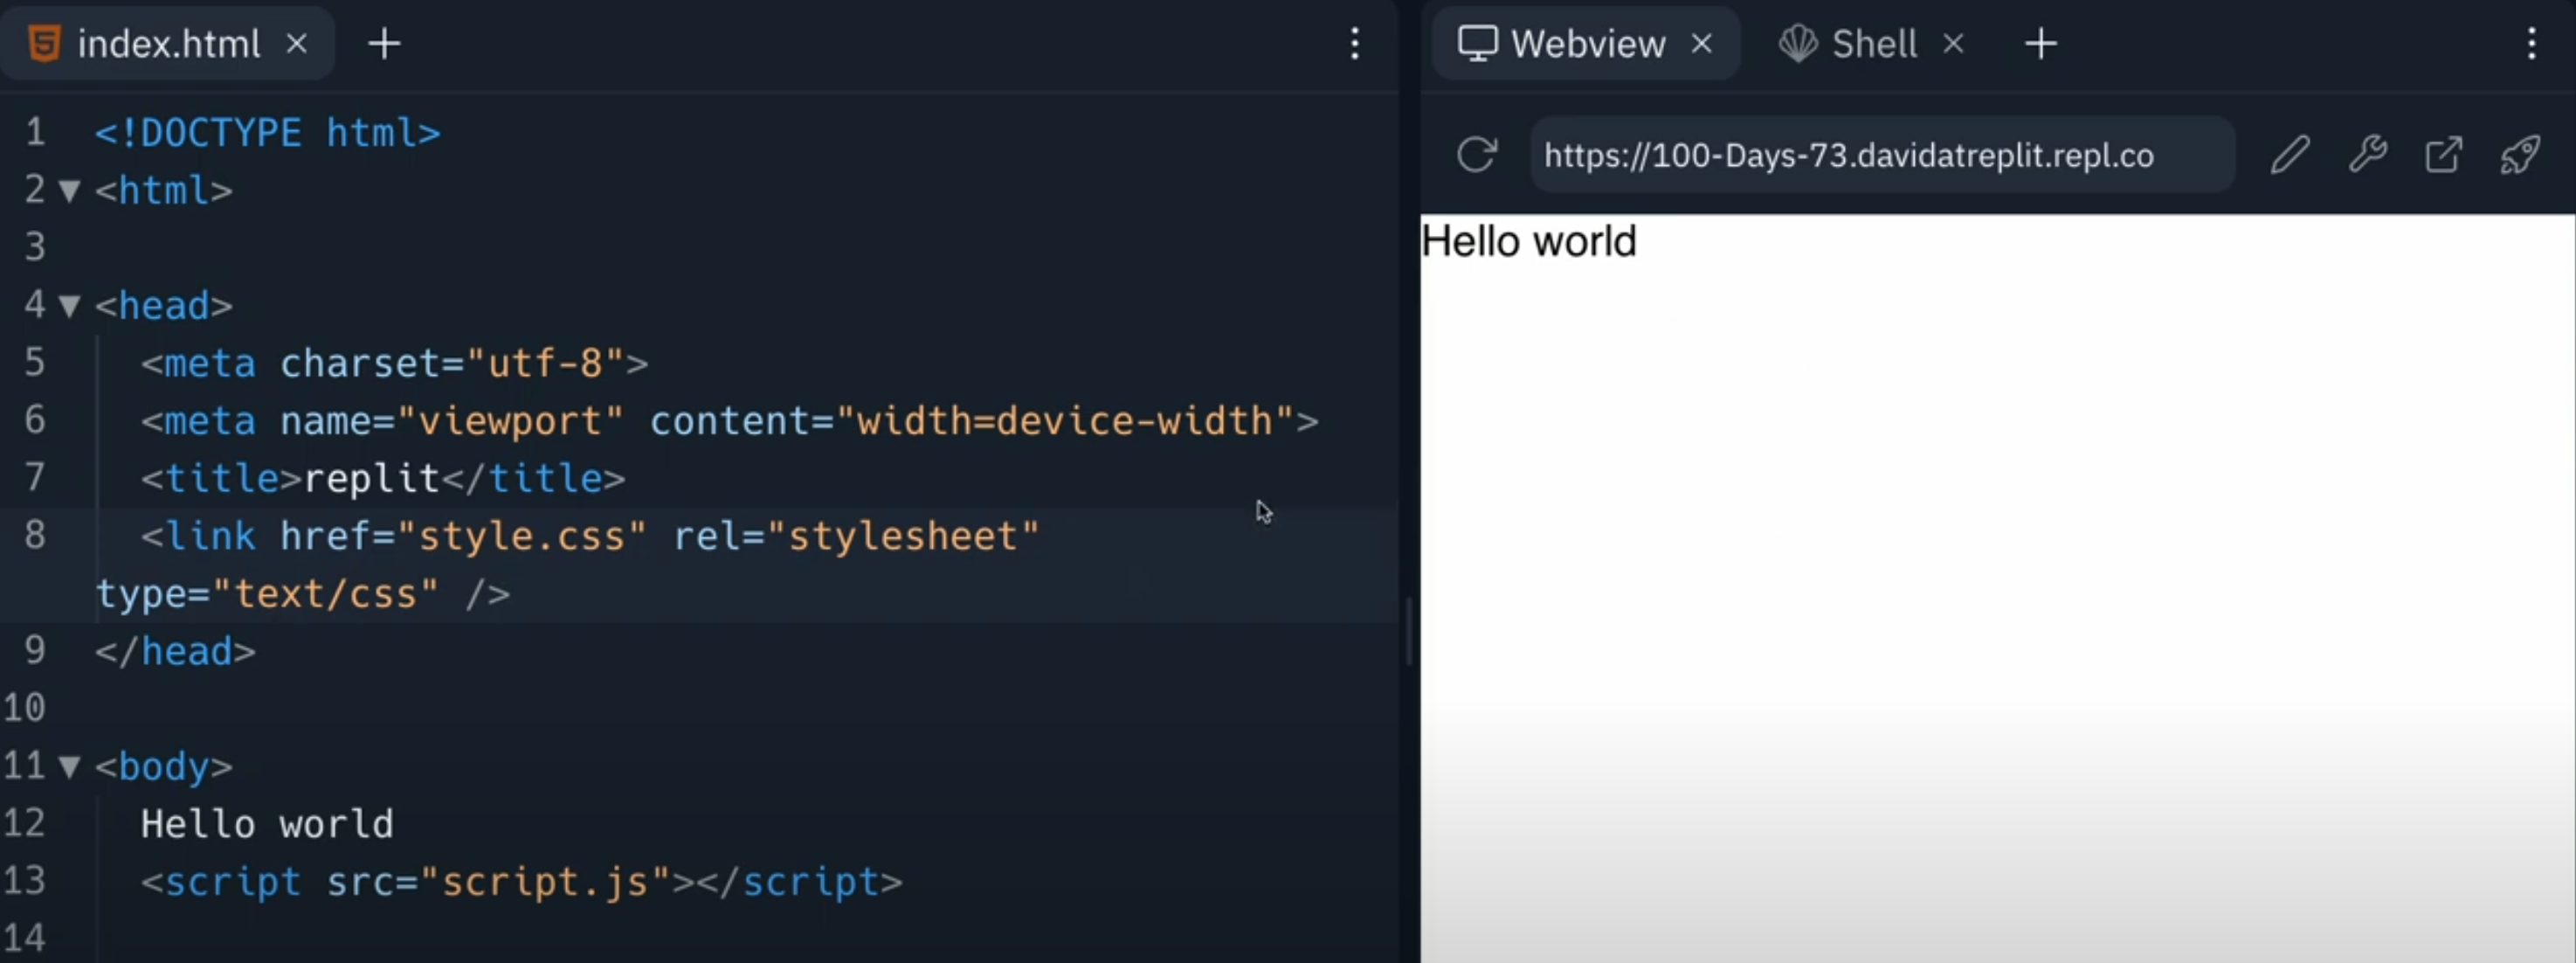

# Tags

Now let's start creating a webpage and learning about the tags.

👉 **Step 1** is to tell the file that this is an HTML page. These are the **first and last tags** on your page.

Notice that the last tag has a forward slash before the command. This means **close** or **end** this tag. With a few exceptions, tags come in pairs:
- An **opening tag** (no `/`)
- A **closing tag** (with a `/`).

```html
<html>
</html>
```
# Head

The `<head>` tags contain a lot of invisible information about the page that you won't see on screen. Stuff like:

- How to display your webpage on different devices (desktop vs. mobile device)
- Keywords

The tag that we really care about inside `<head>` is the `<title>` tag. You do sort of see this on screen. It's the text that goes in the tab of the web page.

Also notice the **indentation**. This doesn't affect the way the code works (like it does in Python), but it is standard practice to show how some tags are inside others. It also makes the code **much easier to read**.

👉 **Let's create the head and title:**

```html
<html>
    <head>
        <title>David's World Of Baldies</title>
    </head>
</html>
```
As soon as you start building with Replit, your site is already on the world wide web!

Copy the URL into a new browser tab or just click the 'Open in a new tab' button to see it!
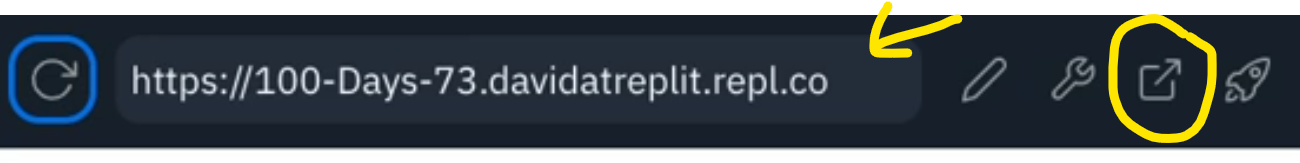

## Body

The visible contents of the page go in the `<body>` tag:

```html
<html>
  <head>
    <title>David's World Of Baldies</title>
  </head>
  <body>
  </body>
</html>
```
## Headings

👉 **Time for headings.** This is the `<h>` tag. There are lots of different pre-defined heading sizes. They are numbered, with 1 being the largest.

```html
<html>
  <head>
    <title>David's World Of Baldies</title>
  </head>
  <body>
    <h1>Dave's World of Baldies</h1>
    <h2>Welcome to our website!</h2>
  </body>
</html>
```
Once you've added the code, refresh the web view page using the internal refresh button to show your changes.

Play around with headings for a while to see what the different sizes look like.

## Paragraphs

👉 The `<p>` tag creates paragraph text. Each new `<p>` tag will create a new paragraph with a vertical spacing from the line above. This will appear using your browser's default font settings. We'll learn about changing those in another lesson.

From here, I'm just going to show the body section of the code to save room.

```html
<body>
  <h1>Dave's World of Baldies</h1>
  <h2>Welcome to our website!</h2>

  <p>We all know that throughout history some of the greatest have been Baldies, let's see the epicness of their heads bereft of hair.</p>

  <h2>Gallery of Baldies</h2>
  <p>Here are some of the legends of the bald world.</p>
</body>
```

## Images

Inserting an image in HTML is a bit trickier than just copying and pasting. We have to:

- Save the image in a folder.
- Name it (ideally with no spaces).
- Tell the HTML where to find the image.

👉 **Let's insert an image.**

1. Drag & drop the image from your local files to the REPL files pane.

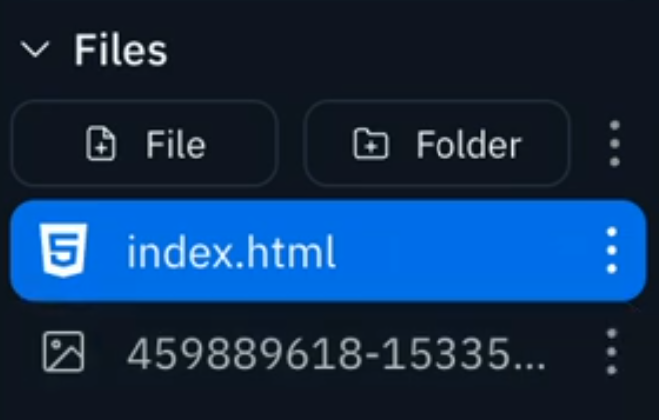

2. Rename it (KEEP THE FILE EXTENSION).

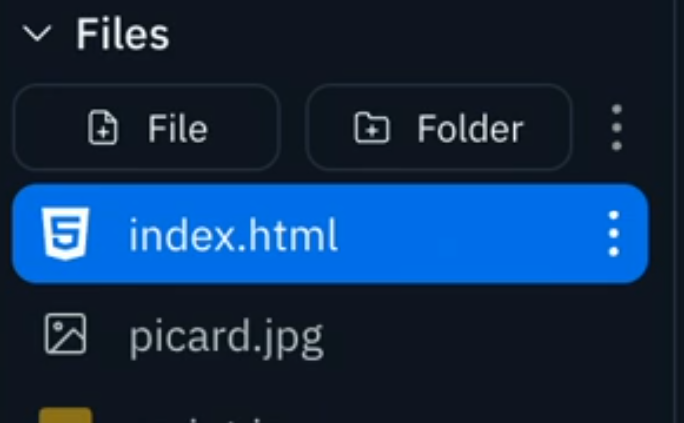

3. Use the ```<img>``` tag in your HTML code to point to the image. The ```src``` part of the tag specifies the location and I can also set the width using % or pixels.

```html

<body>
  <h1>Dave's World of Baldies</h1>
  <h2>Welcome to our website!</h2>

  <p>We all know that throughout history some of the greatest have been Baldies, let's see the epicness of their heads bereft of hair.</p>

  <h2>Gallery of Baldies</h2>
  <p>Here are some of the legends of the bald world.</p>

  <img src="picard.jpg" width = 30%>
  <p>Captain Jean Luc Picard: Baldest Star Trek captain, and legend.</p>
  
</body>
```
We've only got one image here, but if you have lots then your file pane will get messy very quickly. Good practice is to keep your images in a folder (probably called images).

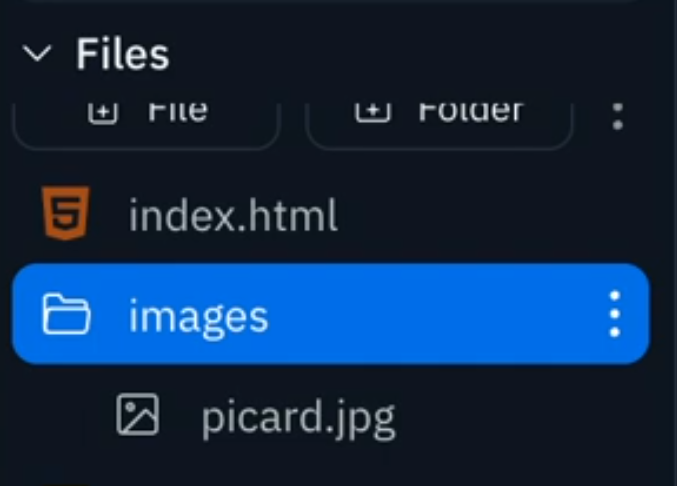

👉 However, if you do this, then you have to change the ```src``` tag to point to that folder first, like this:

```html
<img src="images/picard.jpg" width = 30%>
```
## Bullets

But what makes Picard such a great Baldy? To educate our audience, let's give them a list!

👉 I'm going to use the `<ul>` (unordered list) to create a bullet point list.

If I used the `<ol>` tag instead, I'd get a numbered list.

The `<li>` tag means *list item*, and each item in the list gets one.
```html
<body>
  <h1>Dave's World of Baldies</h1>
  <h2>Welcome to our website!</h2>

  <p>We all know that throughout history some of the greatest have been Baldies, let's see the epicness of their heads bereft of hair.</p>

  <h2>Gallery of Baldies</h2>
  <p>Here are some of the legends of the bald world.</p>

  <img src="picard.jpg" width = 30%>
  <p>Captain Jean Luc Picard: Baldest Star Trek captain, and legend.</p>

  <ul>
    <li>Beautiful bald man</li>
    <li>Calm and cool under pressure</li>
    <li>All the Picard memes</li>
  </ul>
  
</body>
```
## Linky Linky

To link between webpages, we need another page, so let's quickly make one:

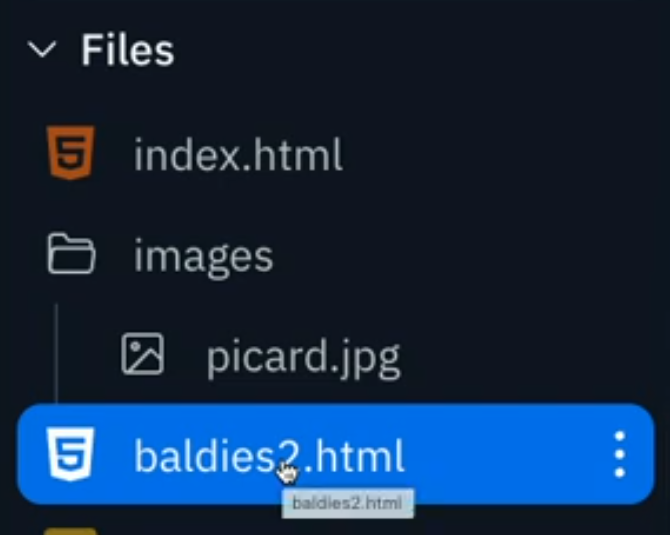

### Adding Links

👉 Now, we can link to it. I've used the `<a href>` tag to create a link at the bottom of my page.

The `href` argument specifies the location of the webpage being linked. It's short for 'hypertext reference.'

```html
<body>
  <h1>Dave's World of Baldies</h1>
  <h2>Welcome to our website!</h2>

  <p>We all know that throughout history some of the greatest have been Baldies, let's see the epicness of their heads bereft of hair.</p>

  <h2>Gallery of Baldies</h2>
  <p>Here are some of the legends of the bald world.</p>

  <img src="images/picard.jpg" width = 30%>
  <p>Captain Jean Luc Picard: Baldest Star Trek captain, and legend.</p>

  <ul>
    <li>Beautiful bald man</li>
    <li>Calm and cool under pressure</li>
    <li>All the Picard memes</li>
  </ul>

  <p><a href = "page2.html">Go to page 2</a></p>
  
</body>
```

👉 If I wanted to link to an external site about Picard, I'd just grab the full page URL and put that as the ```href``` argument. Like this:

```html
<p><a href = "https://memory-alpha.fandom.com/wiki/Star_Trek:_Picard">Captain Jean Luc Picard: Baldest Star Trek captain, and legend.</a></p>
```
To link an image, I would surround the ```<img>``` tags with ```<a>``` tags.



## 🌟 Day 73 Challenge 🌟

Today's challenge is to start making your own web portfolio to showcase your mad coding skills.

### You should:
1. Pick 5 of your best projects from the previous 72 days.
2. Create a webpage with the title **'My Portfolio'**.
3. Add the heading **'Your Name - Portfolio'**.
4. Each of the days you are going to showcase should have:
   - **A second-level heading.**
   - **A paragraph of explainer text.**
   - **An image of each of your repls.**
   - **Each image should be directly linked to the repl.**

### Example:
`Needs a screenshot`

### 💡 Hints

- Use an `<a>` tag around the `<img>` tag to create the linked image.
- Press **Windows + Shift + S** to quick launch the snipping tool. 😁


### Solution in:
* data/website/index.html

# CSS

So far, our webpages have been pretty boring - white background, black text, default fonts, etc.

To make life more interesting, we're going to learn how to use **cascading style sheets** (CSS) to beautify our pages.

CSS has made this a **lot** easier, since before it, web coders had to individually tell each element how to look. CSS lets us create default settings & formats and apply them to parts of our page. It's a bit like having formatting subroutines that you can call at any time.
##
👉 You may have already noticed a **style.css** file in your left hand file pane, and this line in our boilerplate code:

```html
<link href="style.css" rel="stylesheet" type="text/css" />
```

This means that any repl you create automatically comes with it's own styling file that is loaded into the webpage.

This is what the starter style.css page looks like:

```css
html, body {
  height: 100%;
  width: 100%;
}
```

This CSS code tells the `<head>` and `<body>` tags how to look. They have a height & width of 100% (ie they fill the page).

Now let's start creating a webpage and learning about the tags.

👉 I've created a basic baldy page here (It's already in the `index.html` file for you.):

```html
<html>

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width">
  <title>replit</title>
  <link href="style.css" rel="stylesheet" type="text/css" />
</head>

<body>
  
  <h1>Baldies Page 2</h1>
  <p>The continuation of the epic website showing the best of the bald bunch.</p>

  <h2>Yul Brynner</h2>
  <img src="yulBrynner.jpg" width ="200px">
  <p>Yul Brynner is another amazing baldie, a famous actor in the 20th Century, he is most remembered for his roles in "The King and I", and the original "Westworld".</p>
  
</body>

</html>

```

## Before you get started...

- The curly braces are important - they surround the style for each tag.
- Each line should finish with a semi colon - or it won't work.
- Font family lets you pick a particular font or *general style* for your text.  It's generally good practice to use general style rather than specify one font, because the one you pick might not be supported by all web browsers.  [Check out some web safe fonts here.](https://www.w3schools.com/cssref/css_websafe_fonts.php)
- A cool Replit feature is to give you a color picker when you type the color name.  You can click on the colored box to fine tune your color selection.
## Heading Style
👉 The first thing I'm going to style is the heading.  I do this in the **style.css** page by creating a new style for the `<h1>` tag.  The settings I create here will be applied to **all the `<h1>` tags** in my html file.



```css
html, body {
  height: 100%;
  width: 100%;
}

h1{
  font-family: sans-serif;
  font-size: 24px;
  color: blue;
  background-color: #d3d345;
    
}

```

Let's see what this code has done to my webpage. Go back to the index.html file and refresh the webview pane:

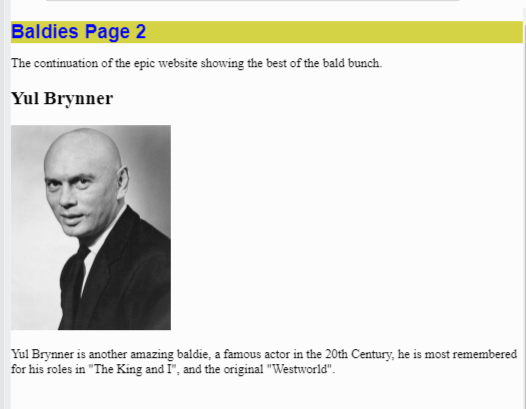

## Paragraph Style
👉 Now, I'm going to style my `<p>` tags:
```css
html, body {
  height: 100%;
  width: 100%;
}

h1{
  font-family: sans-serif;
  font-size: 24px;
  color: blue;
  background-color: #d3d345;
    
}

p{
  font-family: sans-serif;
  font-size: 10px;
  color: blue;
 
    
}

```

This has changed my paragraphs to smaller, blue text.

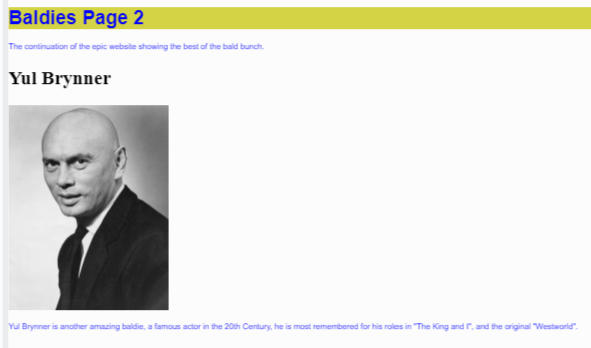

## Background Color
👉 To set the background color for the whole page, add the setting to the `html, body` style:

```css
html, body {
  height: 100%;
  width: 100%;
  [background-color: red;](background-color: #e4e2e2;)
}

```

# Alignment

Another cool thing that we can do in css is to **align** our text.

👉 Let's align the `<h1>` and `<p>` tag text.  I'm using *center*, but you can also use *left* or *right*.

```css
h1{
  font-family: sans-serif;
  font-size: 24px;
  color: blue;
  background-color: #d3d345;
  text-align:center;
    
}

p{
  font-family: monospace;
  font-size: 10px;
  color: blue;
   text-align:center;
    
}
```
##
👉 I also want to apply the `<h1>` settings to the `<h2>` tag, but instead of creating a whole new style, I can just add the tag name at the top of the `<h1>` style:

```css
h1, h2{
  font-family: sans-serif;
  font-size: 24px;
  color: blue;
  background-color: #d3d345;
  text-align:center;
    
}
```

However, I **do** want `<h2>` to be a bit smaller, so I can define a new style **after** the 'h1, h2' style and just change the font size:

```css
html, body {
  height: 100%;
  width: 100%;
  background-color: #e4e2e2;
}

h1, h2{
  font-family: sans-serif;
  font-size: 24px;
  color: blue;
  background-color: #d3d345;
  text-align:center;
    
}

''' THIS IS THE NEW BIT'''
h2{
  font-size: 12px;
  
}

p{
  font-family: monospace;
  font-size: 10px;
  color: blue;
   text-align:center;
    
}
```
### Look familiar?
This second style for `<h2>` works a bit like sub-classes did in OOP. It **inherits** all the properties from the first style and then applies the new settings as well, prioritizing the settings in the second style if there is a conflict.

## Images

👉 We can also use CSS with our image tags. Centering an image isn't very intuitive, but we can do it like this:

```css
img{
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;
  
}
```

## Tags and Classes

It's also possible to directly address a single tag by giving it a class name.

👉 Here's an example of how I've created the `blurb` class directly in a `<p>` tag in the **index.html** page.

```html
<p class = "blurb">Yul Brynner is another amazing baldie, a famous actor in the 20th Century, he is most remembered for his roles in "The King and I", and the original "Westworld".</p>

```
Now, I can style my `blurb` class in the **style.css** file.  Notice how I've referred to it using **dot**blurb -> .blurb

```css
.blurb{
  font-style: italic;
  font-weight: bold;
}
```

# 👉 Day 74 Challenge

Today's challenge is to style up yesterday's code.  

Make it utterly, gorgeously stunning.

Research some other CSS tricks, like boxes and padding and apply them to your code.

That's it. The rest is down to your design preferences.


### 💡 Hints
  
- The [W3 Schools](https://www.w3schools.com/css/) website is an absolute goldmine for HTML and CSS resources.

### Solution in data/website/syle.css

```css
html, body {
  height: 100%;
  width: 100%;
  background-color: #0e1525;
  color: white;
  margin: 0;
  padding: 20px;
}

h1, h2 {
  font-family: monospace;
  font-weight: bold;
  text-align: center;
}

h1 {
  font-size: 36px;
  margin-bottom: 10px;
}

h2 {
  font-size: 24px;
  color: #4a9eff;
}

p {
  font-size: 16px;
  font-family: sans-serif;
  background-color: #1c2333;
  padding: 20px;
  border-radius: 8px;
  margin: 10px 0;
  line-height: 1.6;
}

img {
  background-color: #1c2333;
  padding: 20px;
  border-radius: 8px;
  display: block;
  margin: 20px auto;
  max-width: 100%;
  height: auto;
}

footer .acknowledgements a {
  color: #4a9eff;
  text-decoration: underline;
}

footer .acknowledgements a:hover {
  color: #ffffff;
  text-decoration: none;
}
```

## 🎯 Day 75 Challenge

As the great Jon Bon Jovi almost sang:

_Wooooaahhh, we’re three quarters of the way there…_

OK, OK, lame joke. But seriously, huge kudos on making it to day 75.

Your reward is a project day.


### One Link To Rule Them All

A link tree site is a little bit like a portfolio, but it also contains links to your socials as well as examples of your work.

Having a link tree means that you can put one single link in your socials profile, and that you only have to edit one place to update your links across multiple platforms.


#### Your link tree should have:
1. A picture of you at the top.
2. Your name & social media handles.
3. A series of mid-size headings that link to examples of your work, your profiles, and anything else that you’re proud of.


### Example

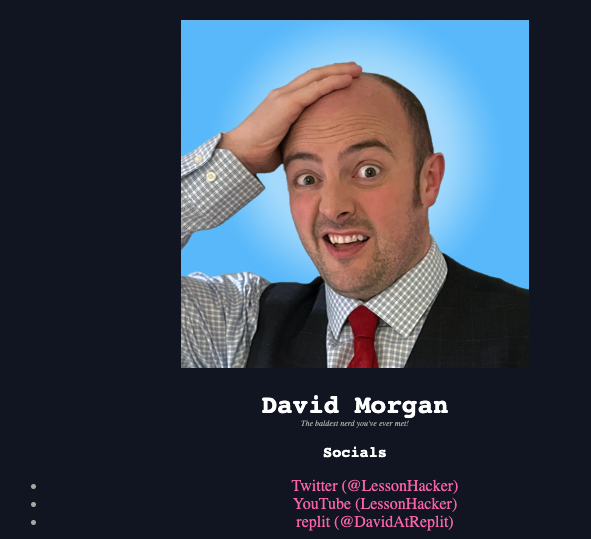

💡 **Hints**

- The [W3 Schools](https://www.w3schools.com/) website is an absolute goldmine for HTML and CSS resources.


### Solution in:
* data/website/index.html
* data/website/script.js

# Flask!

The reason that we've spent the last few days learning HTML & CSS is so that we can combine them with Python by using **Flask**.

Flask lets us build our own web server. This means that it runs all of the time, creating the pages for your entire website.

The reason Flask is different from just using HTML/CSS is that it can be used to build **dynamic web apps** that change depending on the user.

A web server works slightly differently. We make one web server, click `run`, and give the website address to anyone who wants to use the program. This means that _we can make our code private if we want_.

### Heads up!

Flask is a paid feature on Replit. You'll need to [purchase cycles](https://replit.com/~) or a hacker plan if you want to use it. It is super worthwhile if you want to keep your code private, though.

You can set your Replit project to private in the drop-down menu from the top of the page.

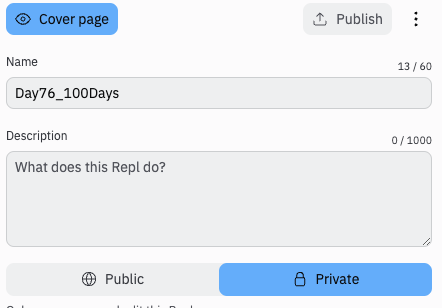

# Free Alternatives for Flask on Replit

## Local Development:
- Install Flask on your local machine using `pip install flask` and run your projects locally without needing Replit's paid services.

## Free Hosting Services:
- **[Render](https://render.com)**: Offers free hosting for Flask applications with a generous free tier.
- **[Railway](https://railway.app)**: Provides free hosting for small Flask projects.
- **[Deta](https://www.deta.sh)**: Free and straightforward for deploying Python-based Flask apps.

## GitHub Pages (Static Alternatives):
- If your web app does not need backend logic (Flask), you can host HTML/CSS/JavaScript projects for free on [GitHub Pages](https://pages.github.com/).

## PythonAnywhere:
- [PythonAnywhere](https://www.pythonanywhere.com/) offers a free tier that supports hosting small Flask applications with some limitations.

# How Is Flask Code Different?

👉 Let's dig into the boilerplate code that you get when you start a Flask repl. Read the comments for explanations:

```python
from flask import Flask  # Imports the flask library

app = Flask(__name__)  # Starts the Flask application. The 'app' variable is very important. We'll be using that later.

@app.route('/')  # Tells the code what to do if we've gone to our web address with just a / after the URL
def index():  # Tells the code which webpage to show. This subroutine will display the 'Hello from Flask' page
    return 'Hello from Flask!'

app.run(host='0.0.0.0', port=81)  # This line should ALWAYS come last. It's the line that turns on the Flask server.
```
👉 When we run this starter code, here's what we get:

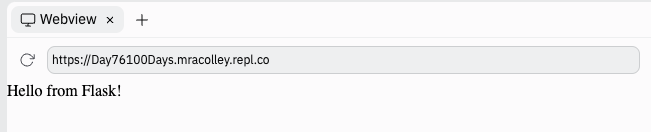

You can see the page URL at the top of the screenshot. You can visit that same URL from your phone/tablet etc. and you'll see the same page.

Whenever you make changes now, refreshing the page won't update it. You need to stop and run the program to view any changes.

# More Pages

### Next, I'm going to add a `home` page to the Flask code.

```python
from flask import Flask

app = Flask(__name__)

@app.route('/')  # Path for the main page
def index():  # Subroutine to handle the main page
    return 'Hello from Flask!'

@app.route('/home')  # Creates the path to the home page
def home():  # Subroutine to create the home page
    # Three quotes followed by the HTML for the baldies site. All the HTML is assigned to the `page` variable
    page = """<html>

    <head>
        <title>David's World Of Baldies</title>
    </head>

    <body>
        <h1>Dave's World of Baldies</h1>
        <h2>Welcome to our website!</h2>

        <p>We all know that throughout history some of the greatest have been Baldies, let's see the epicness of their heads bereft of hair.</p>

        <h2>Gallery of Baldies</h2>
        <p>Here are some of the legends of the bald world.</p>

        <img src="images/picard.jpg" width="300">
        <p><a href="https://memory-alpha.fandom.com/wiki/Star_Trek:_Picard">Captain Jean Luc Picard: Baldest Star Trek captain, and legend.</a></p>

        <ul>
            <li>Beautiful bald man</li>
            <li>Calm and cool under pressure</li>
            <li>All the Picard memes</li>
        </ul>

        <p><a href="page2.html">Go to page 2</a></p>
    </body>

    </html>
    """
    return page  # Returns the contents of the page variable

app.run(host='0.0.0.0', port=81)
```
Now if we visit the page URL/home in our browser, we will be whisked to the home page to view the design masterpiece that we've created.

You may notice here that the images are missing, so that's what we're going to do next.

# Images With Flask

To get images with Flask, follow these steps:

1. **Create a folder** in the file pane. By default, it's called `static`.
2. **Upload any files** you want your webpages to access (e.g., images, audio, video) into the `static` folder.
   - You can create subfolder structures within the `static` folder to help keep things organized.
3. **Add a new property** to the `app = Flask` line of code to specify the static folder path.

```python
app = Flask(__name__, static_url_path="/static")
```

I've added an 'images' subfolder and uploaded my Picard image to there.

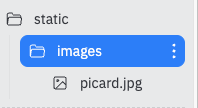

Now I've updated the `<img>` tag to reference the `static` folder:

```html
<img src="static/images/picard.jpg" width="30%">
```

# fStrings With Flask

One of the cool things we can do is use fStrings to format some content inside our webpages.

### Steps:
1. Write the code to get today's date inside the `home` function.
2. Format the HTML as an fString.
3. Use curly braces to drop the date variable into the HTML.

### Code Example:
```python
from flask import Flask  # Import Flask library
import datetime  # Import datetime library

app = Flask(__name__, static_url_path="/static")  # Initialize the Flask app with a static folder

@app.route('/')  # Route for the home page
def index():
    return 'Hello from Flask!'

@app.route('/home')  # Route for the home page
def home():
    today = datetime.date.today()  # Get today's date
    page = f"""<!DOCTYPE html>
    <html>
        <head>
            <title>David's World Of Baldies</title>
        </head>
        <body>
            <h1>Dave's World of Baldies</h1>
            <h2>Welcome to our website!</h2>
            <h2>{today}</h2>  <!-- Inject today's date -->
            <p>We all know that throughout history some of the greatest have been Baldies, let's see the epicness of their heads bereft of hair.</p>
            <h2>Gallery of Baldies</h2>
            <p>Here are some of the legends of the bald world.</p>
            <img src="static/images/picard.jpg" width=30%>
            <a href="https://memory-alpha.fandom.com/wiki/Star_Trek:_Picard">Captain Jean Luc Picard: Baldest Star Trek captain, and legend.</a>
            <ul>
                <li>Beautiful bald man</li>
                <li>Calm and cool under pressure</li>
                <li>All the Picard memes</li>
            </ul>
            <p><a href="page2.html">Go to page 2</a></p>
        </body>
    </html>"""
    return page  # Return the formatted page

app.run(host='0.0.0.0', port=81)  # Run the Flask app
```
# Linking With Flask

To add a link from our index page to the home page, we can modify the `index` function in Flask to include an HTML link.

### Code Example:
```python
from flask import Flask  # Import Flask library
import datetime  # Import the datetime library

# Initialize Flask app and define static folder path
app = Flask(__name__, static_url_path="/static")

@app.route('/')  # Define the route for the index page
def index():
    # Create a simple HTML page with a link to the home page
    page = f"""<!DOCTYPE html>
    <html>
        <body>
            <p><a href="/home">Go home</a></p>  <!-- Link to the home page -->
        </body>
    </html>"""
    return page  # Return the HTML content
```


# Day 76 Challenge

Today's challenge is to create a Flask web server with **two website endpoints**.

## Requirements:
1. Have a `/portfolio` endpoint which displays your portfolio page.
2. Have a `/linktree` endpoint which displays your linktree page.

### Example:
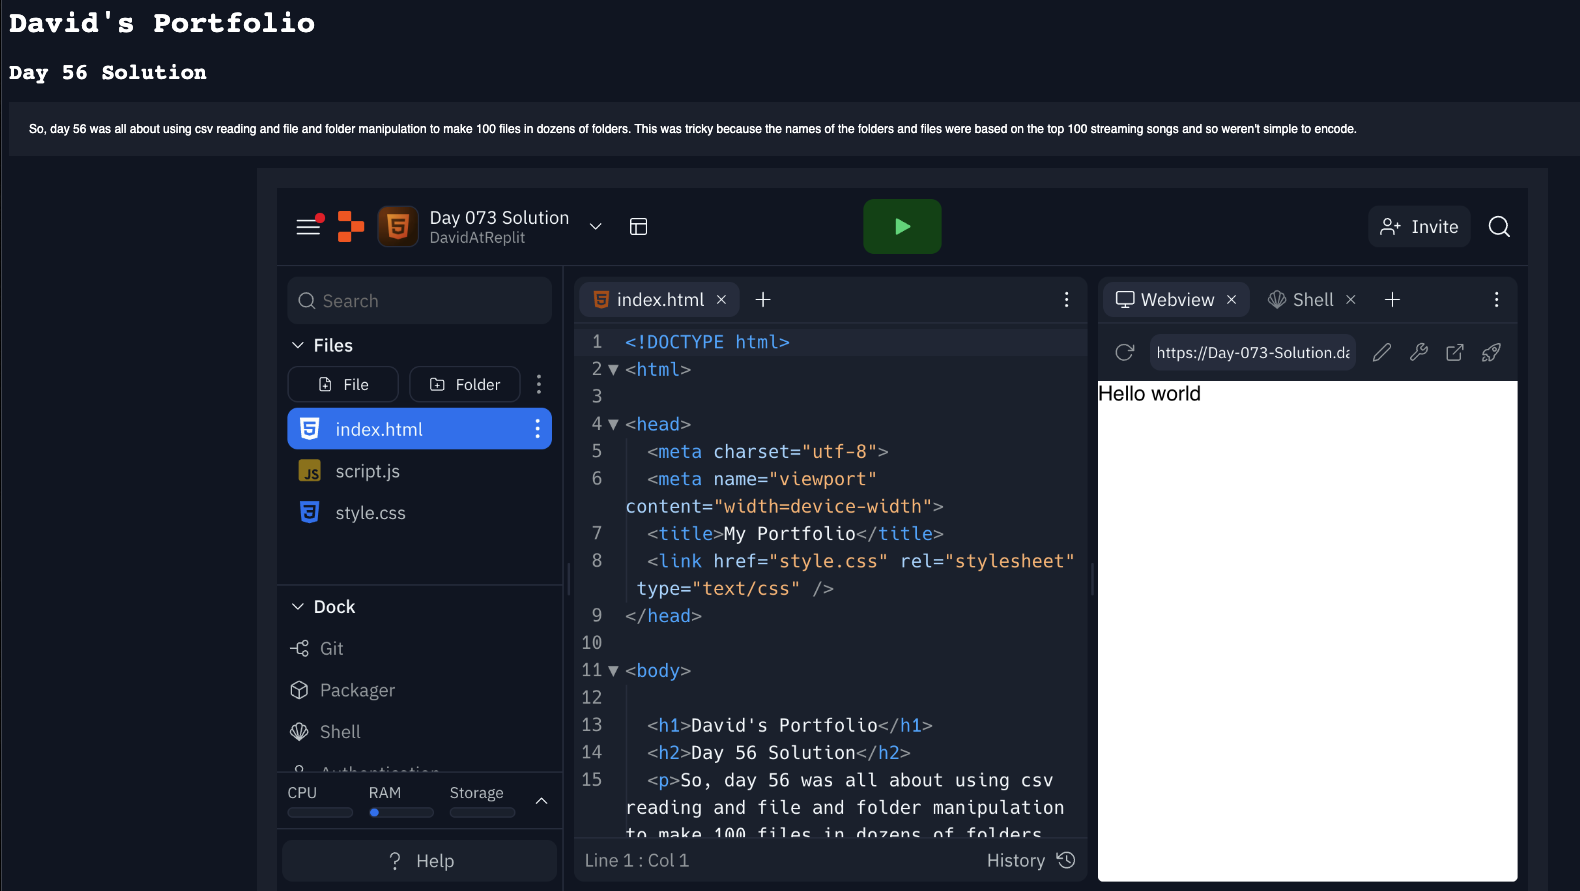

## Hints:
- Ensure you have a `static` folder for all your media and CSS files to keep things organized and properly referenced.
- If you have multiple CSS files with the same name, rename one to avoid conflicts and ensure the correct styles are applied.


### Solution in:
* data\website\flask

# Day 77 Challenge

Today's challenge is to set up a simple template for a blog.

## Your template should:
1. Have a space for a heading.
2. Have a space for today's date.
3. Have a space for the text.

### Additional Requirements:
- Write two different blog entries and serve them on two different endpoints.
- Both blog entries should use the same template and have shortened redirects to their URLs.

### Implementation Notes:
While the challenge suggests using `f = open()` and `f.read()` for basic template handling, we opted to use Flask's `render_template()` because it:
- Handles UTF-8 encoding automatically
- Provides built-in security features
- Supports template inheritance
- Offers better error handling
- Is the Flask recommended approach

### Example:
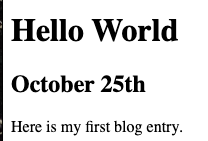

### 💡 Hints:
- Basic approach: Use `f = open()` and `f.read()` to load the HTML content from your template file into Python.
- Advanced approach: Use Flask's `render_template()` for better template handling and security.


### Solution in:
* data\website\flask\templates\blog.html

# Day 78 Challenge

Today's challenge is to build a place to store your reflections on the next 22 days of code.

💡 To help you achieve this, here's one more skill.

In the code below, I have used a variable in chevrons to pull in anything past the first `/` in the URL.

I can then use that in my definition and call it for use in my page. Here's the code:

```python
from flask import Flask

app = Flask(__name__)

@app.route('/<pageNumber>')
def index(pageNumber):
    return f"This is page {pageNumber}"
```

### Your Program Should:

1. **Have a template for the page**, accessible by going to `URL/dayNumber` (e.g., `myLovelyWebsite/78`).
2. **Each page should have**:
   - The day number in a title.
   - A link to your Replit project.
   - Your reflections in the text.
3. **Each page should be nicely styled with CSS**.
4. If you go to the page in a browser, and change the number after the `/`, it should load the relevant page.

### Example:
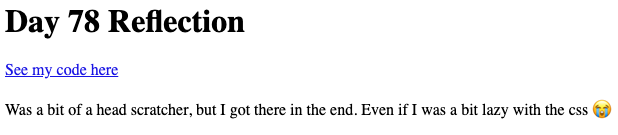

### 💡 Hints
- The easiest way to store all your page content is in a **2D dictionary or list**. 
- You can look up and replace the variables in the Flask code with the content from your dictionary/list.


### Solution in:
* data\website\flask\templates\reflection.html

## Acknowledgements

This project is inspired by the 100 Days of Code challenge on Replit. Please visit [Replit](https://replit.com/) for more information and resources.